# 6.2. Exploring Relationships

## This script contains the following:

### 1.Importing Visualization Libraries and Data

### 2. Exploring Relationships

### 1.Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.2'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Define path

path = r'C:\Users\19452\Desktop\Seema\Careerfoundry-Data Analytics Course\Work Area\Data Immersion\Achievement 6\PythonProject-NewYorkCityAirbnb'

In [5]:
# Import data

df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','6.1','NewYorkCityAirbnb_Clean.csv'))

### 2. Exploring Relationships

In [6]:
df.dtypes

host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [7]:
# Convert 'host_id' column from int to object

df['host_id'] = df['host_id'].astype(object)

### Step 2: host_id is object data type so will not be part of correlation charts. Not removing as it is required for analysis. No other variables are to be discarded.

In [8]:
# Check whether data type for 'host_id' is coverted to object

df.dtypes

host_id                            object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [9]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [10]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [11]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### Correlations

In [12]:
# Exclude non-numeric columns for correlation calculation.  Correlation can not be calculated on non-numeric columns

numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [13]:
# Create a correlation matrix using pandas

numeric_df.corr()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,0.019517,-0.010983
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,-0.114713,0.082731
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,0.057472,0.081829
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,-0.072376,0.172028
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,1.000000,0.225701
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.225701,1.000000


### Step 3: Create a correlation matrix heatmap (colored)

In [14]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Suppress DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Suppress FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

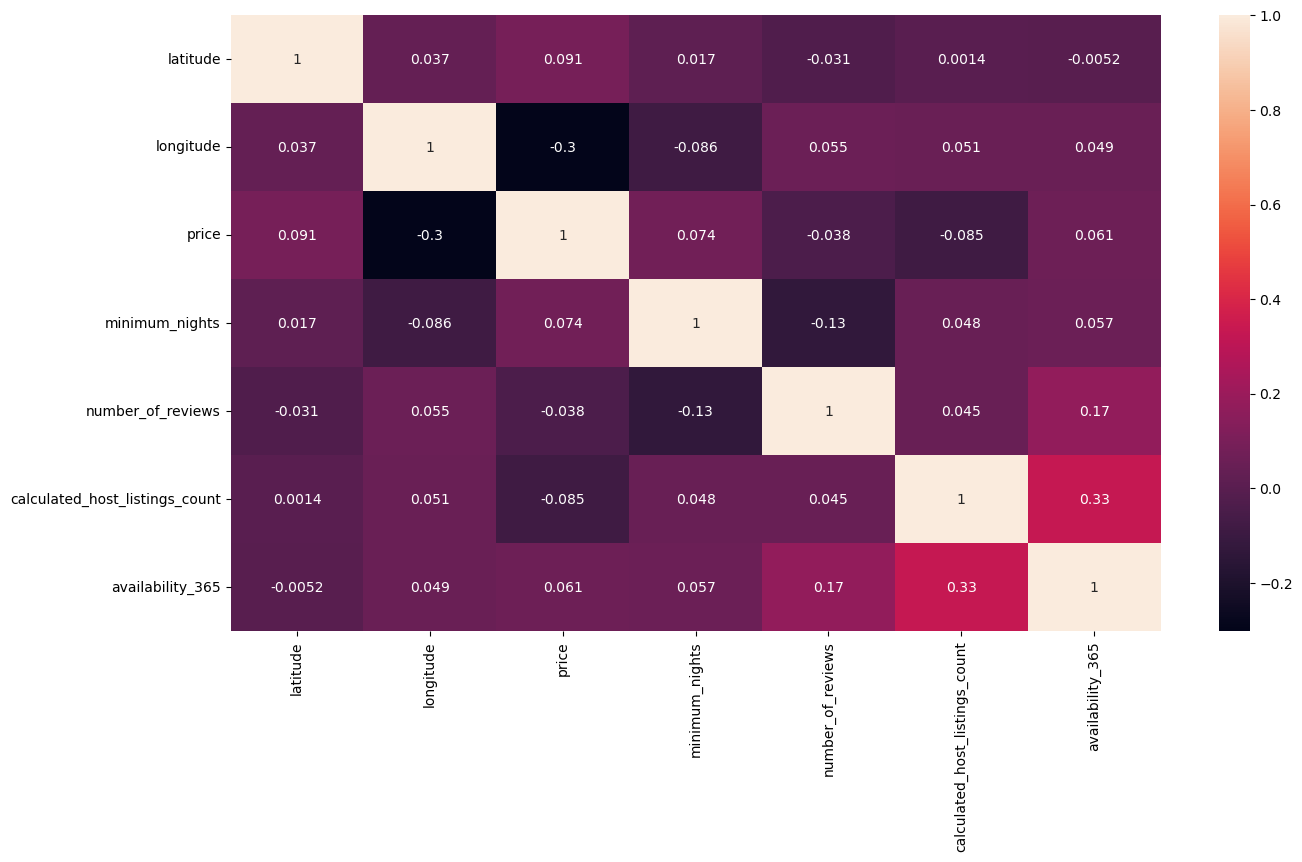

In [15]:
# Get Correlation between different variables

corr = numeric_df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
numeric_df.columns

#### The heat map shows weaker correlations between the variables as they are closer to 0.
#### There could be some correlation between 'calculated_host_listings_count' and 'availability_365', which require further analysis.

### Step 4: Create a scatterplot for the variables with the strongest correlations

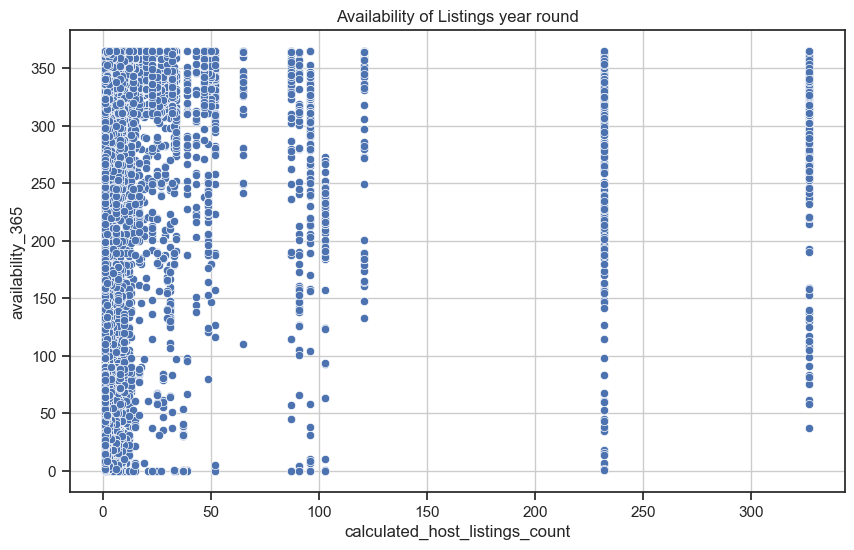

In [37]:
# set the figure size
plt.figure(figsize=(10,6))

# create the scatterplot
sns.scatterplot(x='calculated_host_listings_count',y='availability_365',data=df,palette='Set2')
# plt.ioff()

# set the plot title 
plt.title('Availability of Listings year round')

# add the gridlines
plt.grid(True)

# show the plot
plt.show()

### Majority of the hosts have their property listed for all round the year.

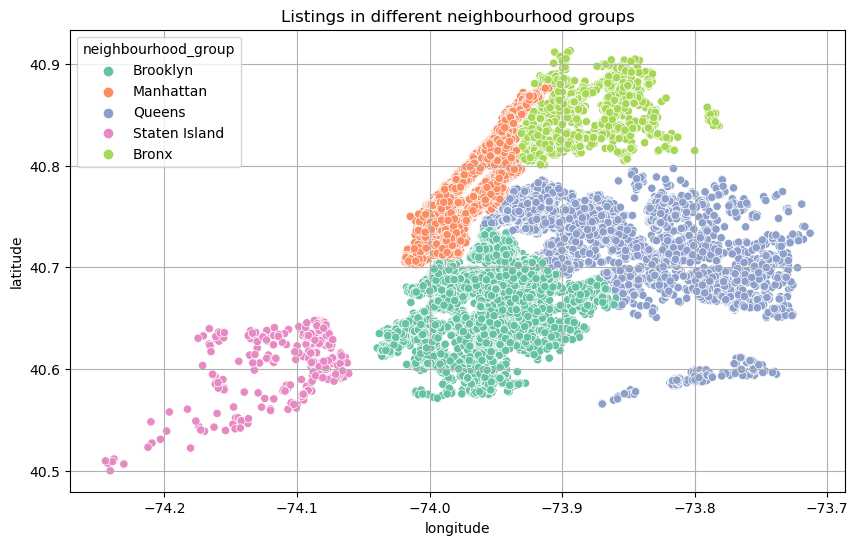

In [17]:
# set the figure size
plt.figure(figsize=(10,6))

# create the scatterplot
sns.scatterplot(x='longitude',y='latitude',data=df,hue=df.neighbourhood_group,palette='Set2')
# plt.ioff()

# set the plot title 
plt.title('Listings in different neighbourhood groups')

# add the gridlines
plt.grid(True)

# show the plot
plt.show()

### Neighbourhood groups and location of the listing

### Brooklyn and Queens have the most listings. Staten island has the least.

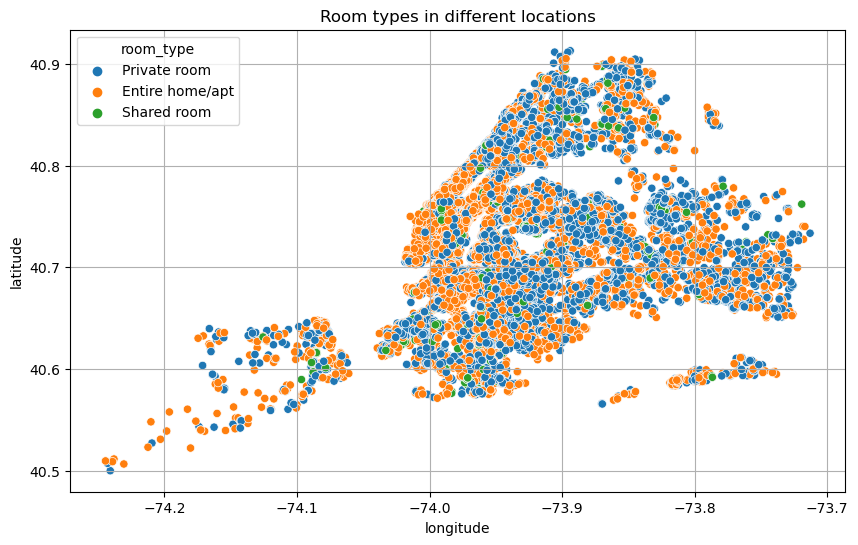

In [18]:
# set the figure size
plt.figure(figsize=(10,6))

# create the scatterplot
sns.scatterplot(x='longitude',y='latitude',data=df,hue=df.room_type)
# plt.ioff()

# set the plot title 
plt.title('Room types in different locations')

# add the gridlines
plt.grid(True)

# show the plot
plt.show()

###  Single family houses/apartments and private rooms listings are spread in most parts of the city.

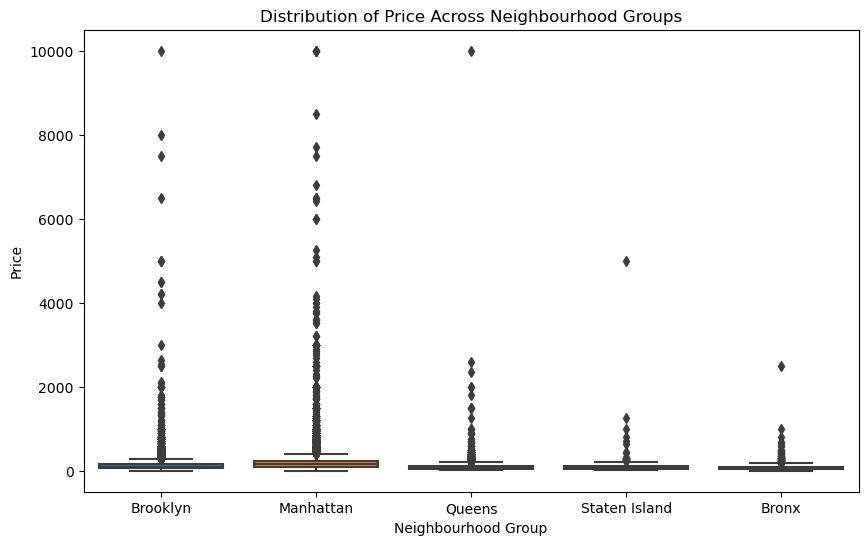

In [19]:
# set the figure size
plt.figure(figsize=(10, 6))

# create the boxplot
sns.boxplot(x='neighbourhood_group', y='price', data=df)

# set the plot title 
plt.title('Distribution of Price Across Neighbourhood Groups')

# X axis label
plt.xlabel('Neighbourhood Group')

# Y axis label
plt.ylabel('Price')

# show the plot
plt.show()

### Brooklyn is the most expensive neighbourhood group, closely followed by Manhattan. Bronx is the least expensive.

### Step 5 - Pair plot of the entire data set
### 5a. -
### 1) Most of the hosts charge rent around $2000 .  It would be worth understanding whether price of lsiting is a major factor in demand for properties in that category. 
### 2) Availabity and host count are another possible variables to explore for correlation.  Majority of hosts keep their listings active through out the year.

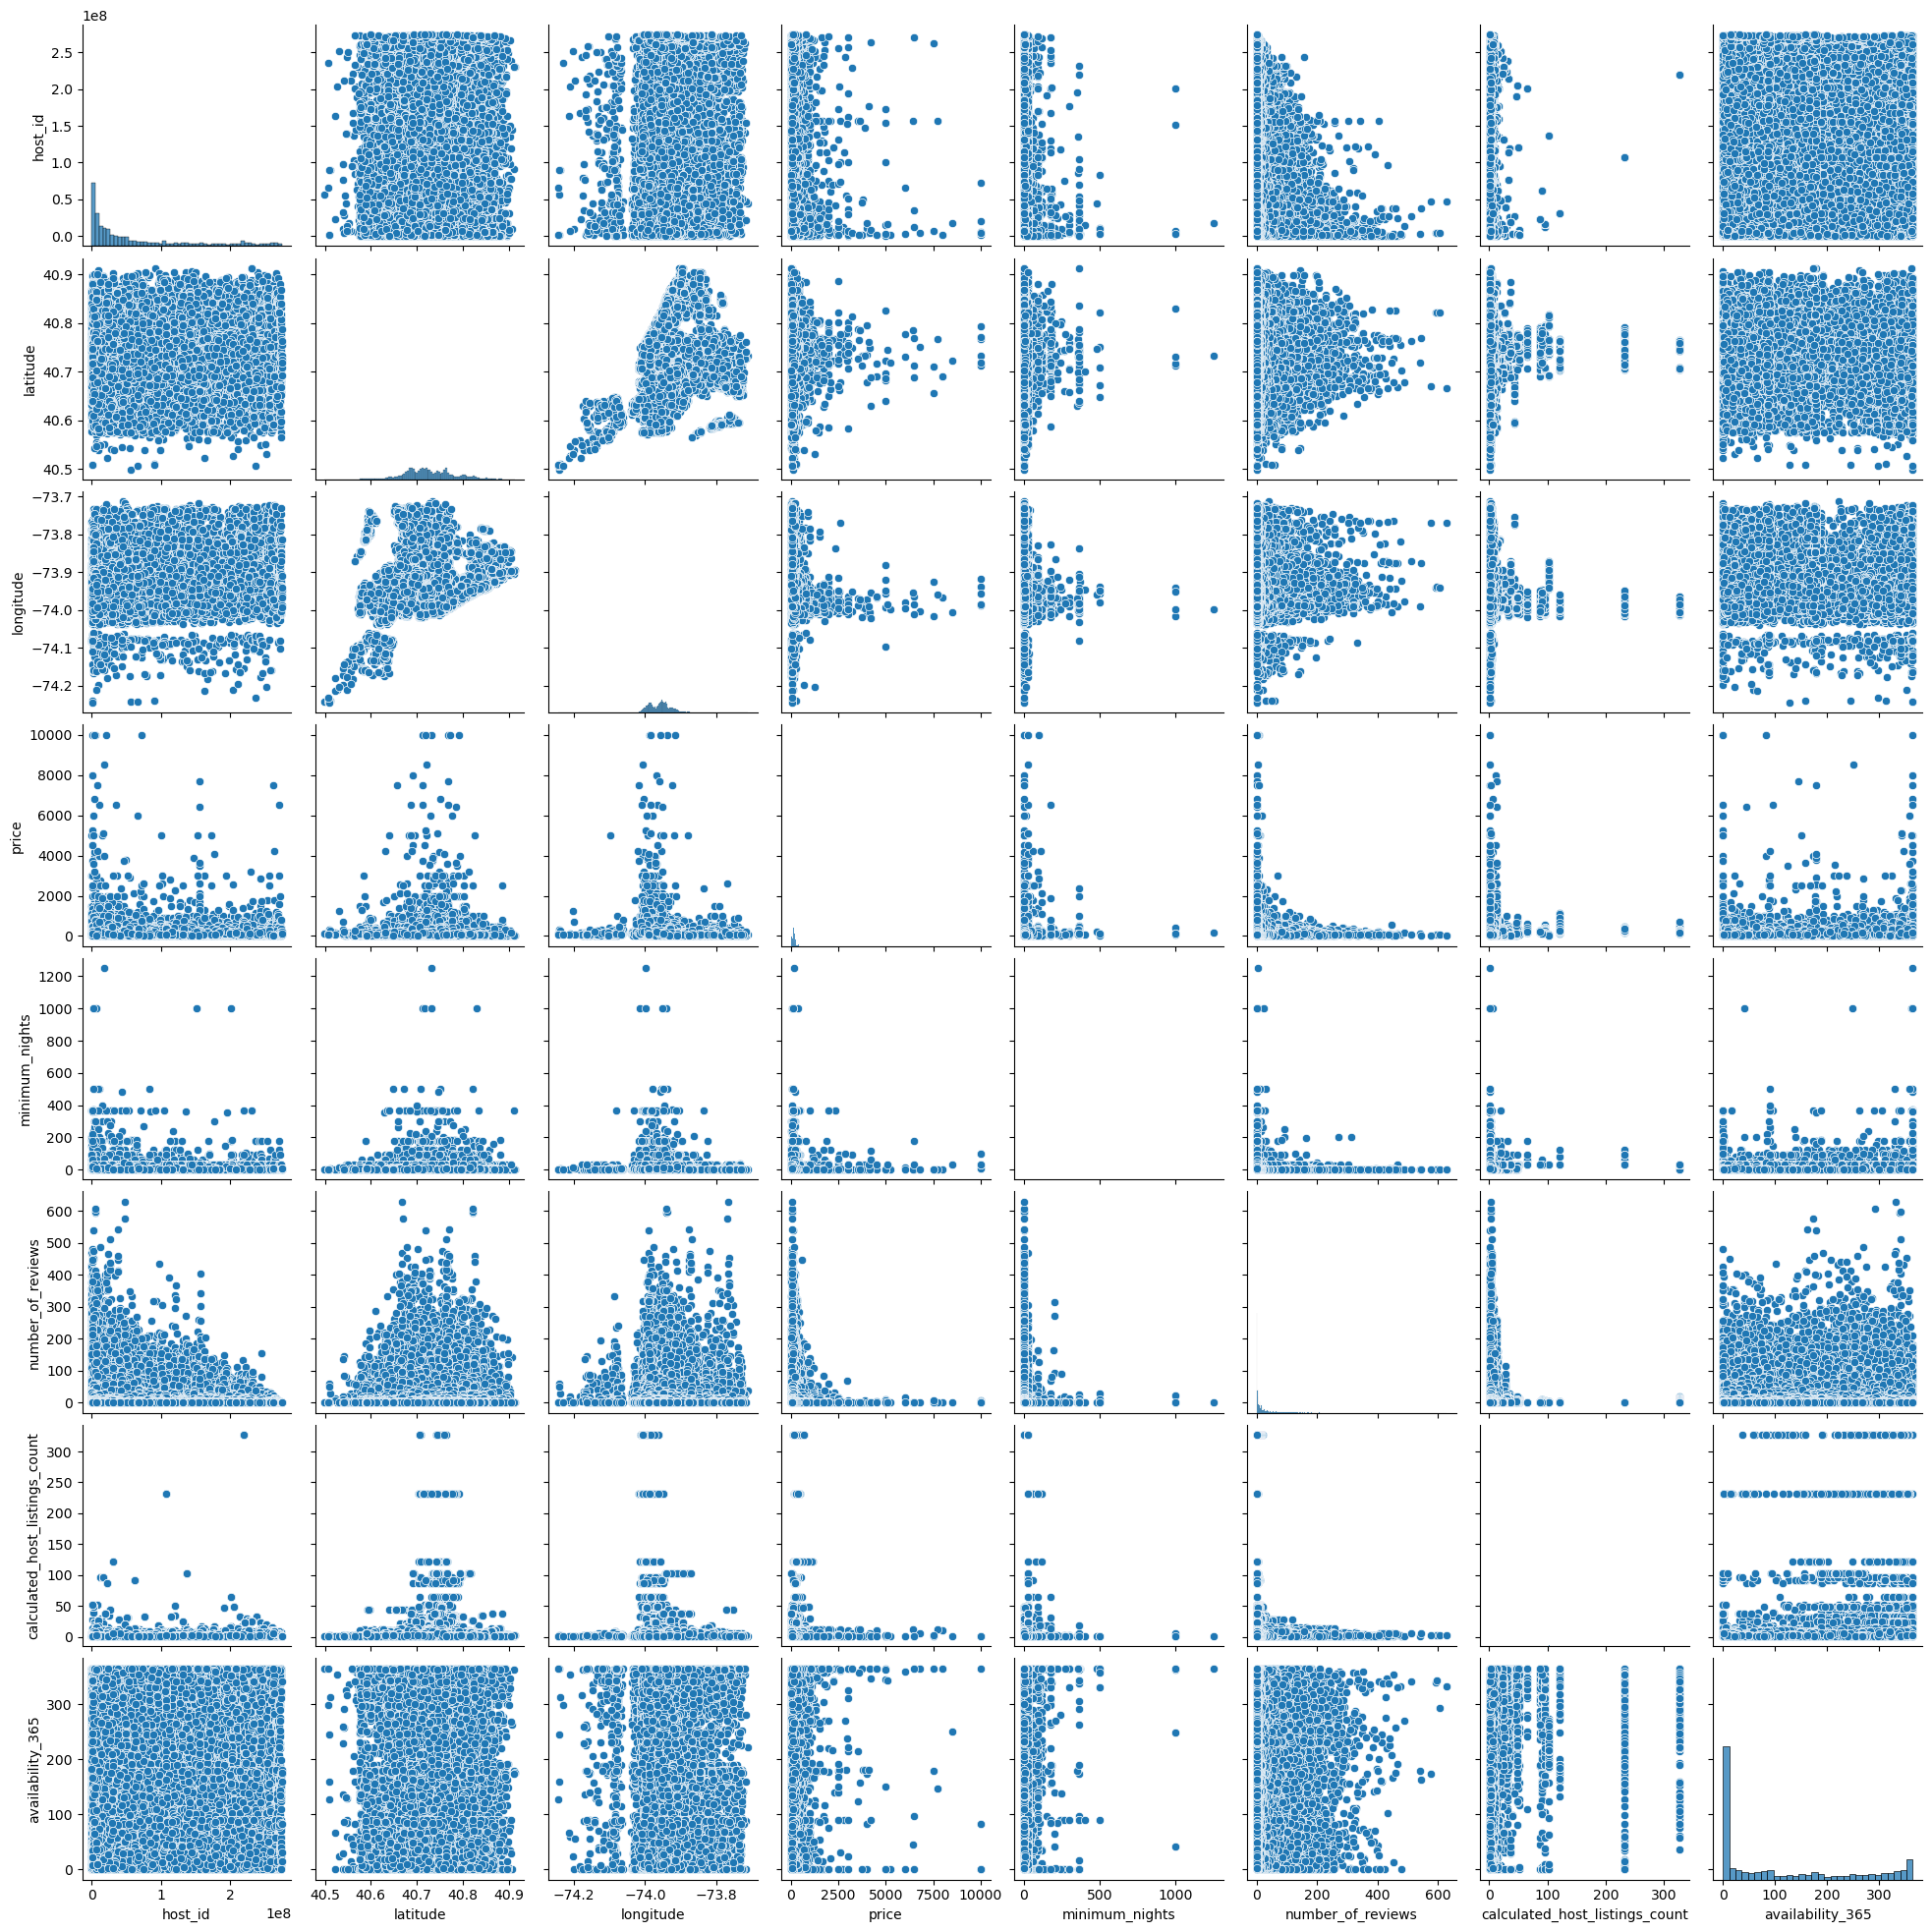

In [20]:
# Pair plot for the entire dataset

sns.pairplot(df)
plt.show()

### Step 6: Create a categorical plot and interpret the results.  This splits availability_365 column into categories.

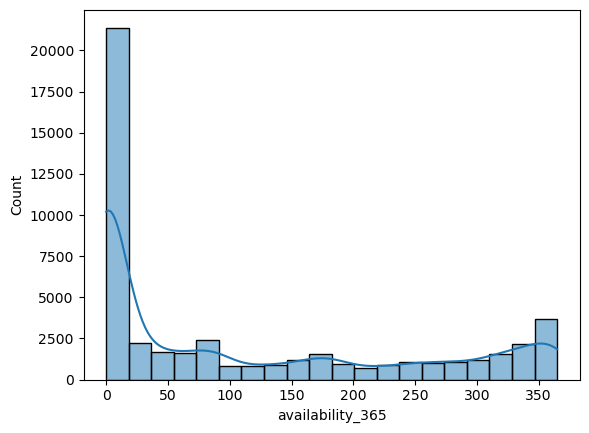

In [21]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the availability ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['availability_365'], bins = 20, kde = True, stat='count')
plt.show()

In [22]:
df.loc[df['price'] < 1000, 'price_category'] = 'Cheapest price'

In [23]:
df.loc[(df['price'] >= 1000) & (df['price'] < 2000), 'price_category'] = 'Moderate price'

In [24]:
df.loc[(df['price'] >= 2000) & (df['price'] <5000), 'price_category'] = 'High price'

In [25]:
df.loc[(df['price'] >= 5000) & (df['price'] <=10000), 'price_category'] = 'Very high price'

In [26]:
df['price_category'].value_counts(dropna=False)

price_category
Cheapest price     48597
Moderate price       188
High price            84
Very high price       26
Name: count, dtype: int64

### Most room types in the market are in 'Cheapest' price category.
### Shared rooms are available only in 'Cheapest' and 'Moderate' price category.
### Majority of very high priced accomodation can be found in 'Entire home/apt' category, though all price categories are available.
### Private rooms are available in all price categories. 

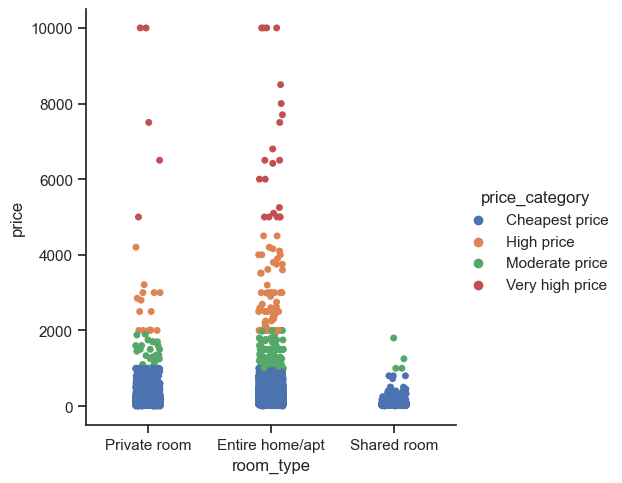

In [27]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="room_type", y="price", hue="price_category", data=df)

In [28]:
df.loc[df['availability_365'] < 90, 'available_category'] = 'Short term'

In [29]:
df.loc[(df['availability_365'] >= 90) & (df['availability_365'] < 180), 'available_category'] = 'Medium term'

In [30]:
df.loc[(df['availability_365'] >= 180) & (df['availability_365'] < 270), 'available_category'] = 'Long term'

In [31]:
df.loc[(df['availability_365'] >= 270) & (df['availability_365'] < 366), 'available_category'] = 'Very Long term'

In [32]:
df['available_category'].value_counts(dropna=False)

available_category
Short term        28956
Very Long term     9930
Medium term        5383
Long term          4626
Name: count, dtype: int64

#### Vast majority of the hosts in the business offer short term stay 

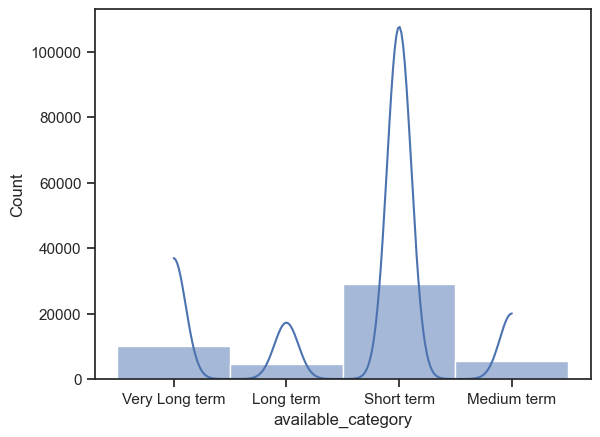

In [33]:
# Use a histogram to visualize the distribution of the variables. 

sns.histplot(df['available_category'], bins = 20, kde = True, stat='count')
plt.show()

### Step 7: Key Questions:-

#### 1.	Is there a difference in demand based on the type of property such as single family house, shared accommodation etc.?
#### Answer:  Yes, Entirehome/apt are most in demand.  The next in demand is Private room.  Shared accomodation properties are the least in demand.

#### 2.	Are the listed properties available through out the year?
#### Answer:  Not all the properties are available all round the year.  Majority of properties in the market are available for short term stay less than 3 months.

#### 3.	What can we learn about different hosts and areas?
#### Answer:  Brooklyn and Manhattan are the most expensive areas.  Bronx is the least expensive neighbourhood.
#### More analysis needed to understand the host behaviour. 

#### 4.	What is the preferred listing price range among the customers?
#### Answer: Properties in the price range '$2000' and below are most in demand.

#### 5.	Which hosts are the busiest and why?
#### Answer: More analysis needed to understand the host behaviour. 

#### 6.	Is there any noticeable difference of traffic among different areas and what could be the reason for it?
#### Answer: Brooklyn and Manhattan has the highest number of Airbnbs and most pricey as well, which shows these areas are much in demand.  These areas are located in the heart of NYC and has connectivity to all attractions and businesses, which could be the reason for higher demand.  Saten island has the least number of Airbnbs. Often referred to as 'forgotten borough' due to its relatively isolated location from the rest of New York City.  However, this area is not the cheapest. The reason could be that it is loved by those who want to be away from the city bustle on a vacation etc.

#### 7.  Are all the room types available in different price range?
#### Answer: Most room types in the market are in 'Cheapest' price category.  Shared rooms are available only in 'Cheapest' and 'Moderate' price category.  Majority of very high priced accomodation can be found in 'Entire home/apt' category, though all price categories are available.  Private rooms are available in all price categories. 

### Step 8: Hypothesis
#### If airbnb listings in most of the cities are entire homes/apts, then they are rented for short term.

In [34]:
# Export df_allmerge dataframe to the prepare data folder as 'allmergedata_1.pkl'

df.to_csv(os.path.join(path,'02 Data','Prepared Data','6.2','NewYorkCityAirbnb_Clean.csv'),index=False)